<a href="https://colab.research.google.com/github/Clinda02/E-commerce_analysis/blob/main/Adidas_dataset/Adidas_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adidas 미국 판매데이터 분석

* 데이터 출처 : Kaggle
 (https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset)

* 데이터 개요 : 칼럼 13 개, 데이터 9648 행
  * Retailer : adidas 브랜드를 판매하는 유통처

  * Retailer ID : 판매점 ID

  * Product : 제품 카테고리

  * Price per Unit : 상품 1개당 가격

  * Units Sold : 판매수량

  * Total Sales : 판매금액

  * Operating Profit : 영업이익(매출액 - 원가)

  * Operating Margin : 영업마진(영업이익율)

  * Sales Method : 판매 방법

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




# (1) 데이터 로드 및 확인






In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 가져오기
adidas = pd.read_csv('/content/data/Adidas US Sales Datasets.csv')

In [ ]:
display(adidas.head(2))
adidas.shape

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store


(9648, 13)

In [ ]:
adidas['Sales Method'].unique()

array(['In-store', 'Outlet', 'Online'], dtype=object)

In [ ]:
adidas.info() # 데이터타입 조회

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


# (2) 데이터 전처리

* **데이터타입 변환**
  
 Retailer          object

 Retailer ID       int64  -> 문자(str)

 Invoice Date      object -> 날짜(datetime)

 Region            object

 State             object

 City              object

 Product           object

 Price per Unit    object -> 숫자(실수, float)

 Units Sold        object -> 숫자(실수, float)

 Total Sales       object -> 숫자(실수, float)

 Operating Profit  object -> 숫자(실수, float)

 Operating Margin  object -> 숫자(실수, float)

 Sales Method      object

## 1) 데이터타입 변환

### Pandas 데이터프레임내 문자 변환

* DataFrame['컬럼명'].str.메소드 형태로 문자열 함수 사용
* 현재 가격, 매출액 등의 컬럼에는 모두 특수문자 '%', '$', ',' 가 포함되어있음

In [ ]:
# 정규표현식으로 특수문자 제거
adidas['Price per Unit'] = adidas['Price per Unit'].str.strip().str.replace('[%$,]', '', regex=True).astype('float') # float 타입으로 변환
adidas['Units Sold'] = adidas['Units Sold'].str.strip().str.replace('[%$,]', '', regex=True).astype('float')
adidas['Total Sales'] = adidas['Total Sales'].str.strip().str.replace('[%$,]', '', regex=True).astype('float')
adidas['Operating Profit'] = adidas['Operating Profit'].str.strip().str.replace('[%$,]', '', regex=True).astype('float')
adidas['Operating Margin'] = adidas['Operating Margin'].str.strip().str.replace('[%$,]', '', regex=True).astype('float')

In [ ]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store


Operating Margin은 백분율이기 때문에 0.01을 곱하여 계산에 사용할 수 있도록 새로운 변수 생성

In [ ]:
adidas['Operating_Margin_rate'] = adidas['Operating Margin']*0.01
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating_Margin_rate
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.50
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.30
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store,0.35
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store,0.35
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store,0.30


## 2) Pandas 시간데이터 다루기

YYYY-mm-dd 형태의 문자 데이터를 pandas의 datetime으로 변환

  * '%Y-%m-%d'

만약 19990101와 같은 형태라면

  * '%Y%m%d'


In [ ]:
adidas.head(1)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating_Margin_rate
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.5


In [ ]:
adidas['Invoice Date'] = pd.to_datetime(adidas['Invoice Date'], format='%Y-%m-%d')

In [ ]:
adidas['year'] =adidas['Invoice Date'].dt.year
adidas['month'] =adidas['Invoice Date'].dt.month

In [ ]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating_Margin_rate,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.50,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.30,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store,0.35,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store,0.35,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store,0.30,2020,1


## 3) 문자를 숫자로 변환

In [ ]:
adidas['Retailer ID'] = adidas['Retailer ID'].astype('string')

## 4) 결측치 처리

In [ ]:
adidas.isnull().sum() # 결측치 없음

,0
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Product,0
Price per Unit,0
Units Sold,0
Total Sales,0


In [ ]:
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Retailer               9648 non-null   object        
 1   Retailer ID            9648 non-null   string        
 2   Invoice Date           9648 non-null   datetime64[ns]
 3   Region                 9648 non-null   object        
 4   State                  9648 non-null   object        
 5   City                   9648 non-null   object        
 6   Product                9648 non-null   object        
 7   Price per Unit         9648 non-null   float64       
 8   Units Sold             9648 non-null   float64       
 9   Total Sales            9648 non-null   float64       
 10  Operating Profit       9648 non-null   float64       
 11  Operating Margin       9648 non-null   float64       
 12  Sales Method           9648 non-null   object        
 13  Ope

# (3) 데이터분석


## 월별 판매량 분석

In [ ]:
adidas.describe()

,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Operating_Margin_rate,year,month
count,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.282131,42.299129,0.422991,2020.865050,6.458126
min,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,10.000000,0.100000,2020.000000,1.000000
25%,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1922.000000,35.000000,0.350000,2021.000000,3.000000
50%,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.500000,41.000000,0.410000,2021.000000,6.000000
75%,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52063.000000,49.000000,0.490000,2021.000000,9.000000
max,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,80.000000,0.800000,2021.000000,12.000000
std,NaN,14.705397,214.252030,141916.016727,54193.124141,9.719742,0.097197,0.341688,3.454799


월별 판매량 그래프


<Axes: xlabel='year,month'>

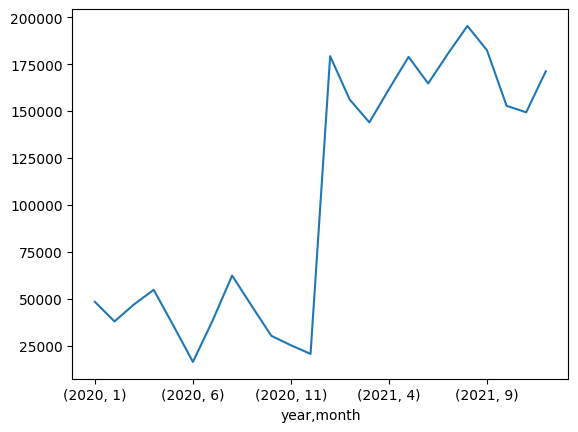

In [ ]:
adidas.groupby(['year','month'])['Units Sold'].sum().plot.line()

2021년 1월부터 판매량이 급등

In [ ]:
adidas.groupby(['year','month'])['Units Sold'].sum()

year  month
2020  1         48333.0
      2         37846.0
      3         46972.0
      4         54709.0
      5         35705.0
      6         16269.0
      7         38219.0
      8         62307.0
      9         46125.0
      10        30167.0
      11        25152.0
      12        20545.0
2021  1        179299.0
      2        156113.0
      3        143988.0
      4        161717.0
      5        178900.0
      6        164745.0
      7        180481.0
      8        195414.0
      9        182425.0
      10       152834.0
      11       149350.0
      12       171246.0
Name: Units Sold, dtype: float64

In [ ]:
adidas.pivot_table(index = 'year', columns=  'month', values='Units Sold', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,48333.0,37846.0,46972.0,54709.0,35705.0,16269.0,38219.0,62307.0,46125.0,30167.0,25152.0,20545.0
2021,179299.0,156113.0,143988.0,161717.0,178900.0,164745.0,180481.0,195414.0,182425.0,152834.0,149350.0,171246.0


소매업체별 분석

In [ ]:
adidas.pivot_table(index=['year', 'month'], columns = 'Retailer', values = 'Units Sold', aggfunc = 'sum')

Retailer     Amazon  Foot Locker   Kohl's  Sports Direct  Walmart  West Gear
year month                                                                  
2020 1          NaN      30275.0      NaN            NaN      NaN    18058.0
     2          NaN      14712.0      NaN            NaN      NaN    23134.0
     3          NaN      27650.0      NaN            NaN      NaN    19322.0
     4          NaN       2216.0      NaN            NaN  22146.0    30347.0
     5          NaN       2071.0      NaN         4584.0  10950.0    18100.0
     6          NaN          NaN      NaN            NaN      NaN    16269.0
     7          NaN          NaN      NaN        15198.0   1630.0    21391.0
     8          NaN      17796.0      NaN        10337.0  29676.0     4498.0
     9          NaN       5625.0      NaN         6203.0  19619.0    14678.0
     10         NaN       4446.0      NaN         9944.0  15777.0        NaN
     11         NaN       8193.0      NaN            NaN      NaN    16959.0
     12         NaN       7320.0   2214.0            NaN      NaN    11011.0
2021 1      13006.0      40384.0  29841.0        28070.0      NaN    67998.0
     2      14609.0      36526.0  32766.0        25159.0   1617.0    45436.0
     3      13204.0      31078.0  31904.0        38838.0   3409.0    25555.0
     4      12548.0      26734.0  37976.0        49526.0   6784.0    28149.0
     5      15489.0      35513.0  47726.0        38996.0   8007.0    33169.0
     6      17917.0      56632.0  15116.0        23859.0  10949.0    40272.0
     7      19510.0      59350.0  16403.0        27413.0  16342.0    41463.0
     8      18014.0      41453.0  15675.0        70385.0  17343.0    32544.0
     9      14879.0      24116.0  13671.0        90087.0  15359.0    24313.0
     10     17767.0      28945.0  12409.0        56195.0  13204.0    24314.0
     11     20456.0      43742.0  14765.0        30090.0   9090.0    31207.0
     12     20591.0      59592.0  16909.0        32756.0   4323.0    37075.0

<Axes: xlabel='year,month'>

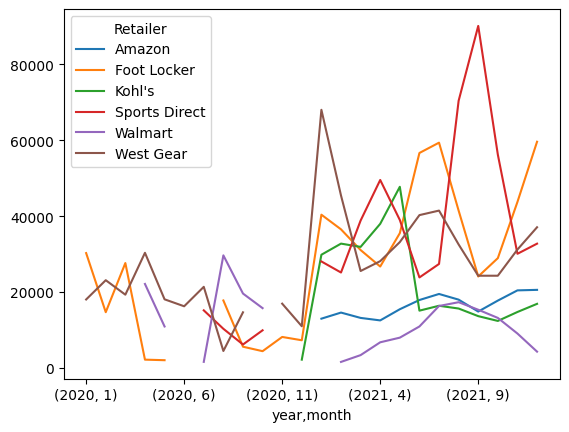

In [ ]:
adidas.pivot_table(index=['year', 'month'], columns = 'Retailer', values = 'Units Sold', aggfunc = 'sum').plot.line()

In [ ]:
 adidas[['Retailer', 'Retailer ID']].drop_duplicates().sort_values('Retailer')
# 소매브랜드 안에도 ID가 여러개 있음(해당 소매점 브랜드의 점포 ID로 보임)

,Retailer,Retailer ID
1148,Amazon,1185732
2007,Foot Locker,1197831
1287,Foot Locker,1128299
0,Foot Locker,1185732
212,Kohl's,1189833
2147,Kohl's,1128299
1499,Kohl's,1185732
2786,Kohl's,1197831
766,Sports Direct,1185732
68,Sports Direct,1197831


월별로 상점의 숫자는 어떻게 될까?


예) 2020년에는 Foot Locker의 상점 수가 1개였는데 2021년에는 3개로 늘지 않앗을까?


In [ ]:
df = adidas[['Retailer', 'Retailer ID', 'year','month']].drop_duplicates().sort_values(['Retailer','Retailer ID', 'year', 'month'])
df

,Retailer,Retailer ID,year,month
1224,Amazon,1185732,2021,1
1225,Amazon,1185732,2021,2
1231,Amazon,1185732,2021,3
1237,Amazon,1185732,2021,4
1243,Amazon,1185732,2021,5
...,...,...,...,...
2769,West Gear,1197831,2021,8
2775,West Gear,1197831,2021,9
2714,West Gear,1197831,2021,10
2715,West Gear,1197831,2021,11


In [ ]:
# 연월별 소매 브랜드 개수 집계
df.pivot_table(index = ['year', 'month'], values = 'Retailer ID', aggfunc = 'count')

Retailer ID
year month             
2020 1                2
     2                2
     3                2
     4                4
     5                4
     6                1
     7                3
     8                5
     9                4
     10               3
     11               2
     12               3
2021 1               14
     2               15
     3               15
     4               15
     5               15
     6               13
     7               15
     8               16
     9               15
     10              16
     11              14
     12              13

<Axes: xlabel='year,month'>

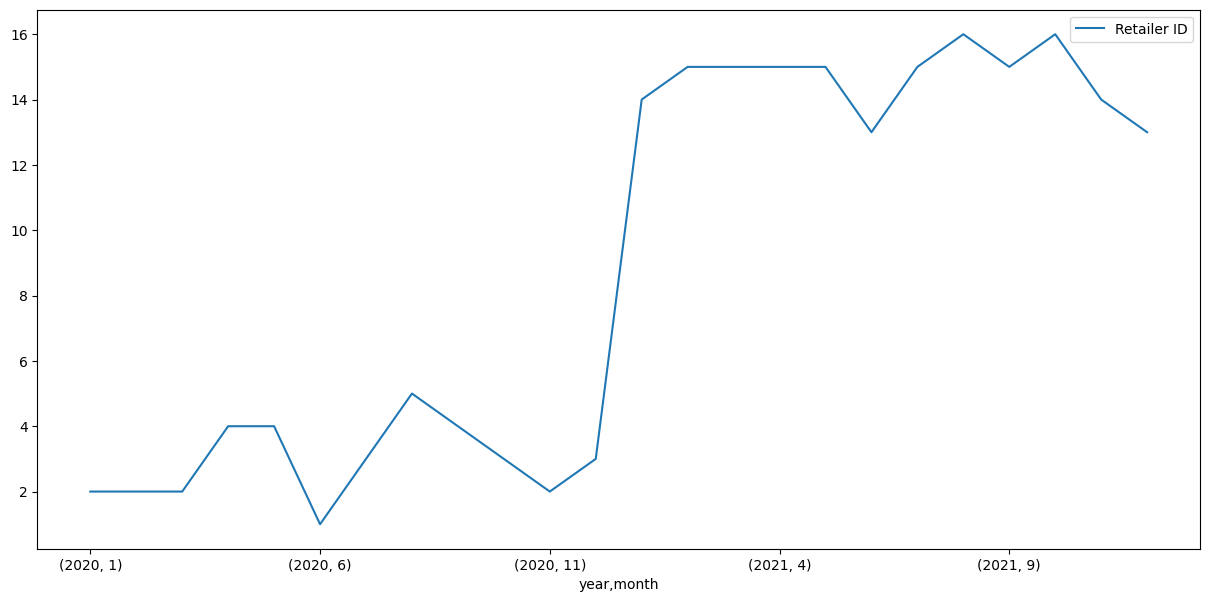

In [ ]:
# 연월별 소매브랜드 개수 시각화
df.pivot_table(index = ['year', 'month'], values = 'Retailer ID', aggfunc = 'count').plot(kind = 'line', figsize = (15,7))

In [ ]:
# 연월에 따른 소매브랜드별 개수 증감 추이 확인
df.pivot_table(index = ['year', 'month'], columns = 'Retailer',values = 'Retailer ID', aggfunc = 'count')

Retailer    Amazon  Foot Locker  Kohl's  Sports Direct  Walmart  West Gear
year month                                                                
2020 1         NaN          1.0     NaN            NaN      NaN        1.0
     2         NaN          1.0     NaN            NaN      NaN        1.0
     3         NaN          1.0     NaN            NaN      NaN        1.0
     4         NaN          1.0     NaN            NaN      1.0        2.0
     5         NaN          1.0     NaN            1.0      1.0        1.0
     6         NaN          NaN     NaN            NaN      NaN        1.0
     7         NaN          NaN     NaN            1.0      1.0        1.0
     8         NaN          1.0     NaN            1.0      1.0        2.0
     9         NaN          1.0     NaN            1.0      1.0        1.0
     10        NaN          1.0     NaN            1.0      1.0        NaN
     11        NaN          1.0     NaN            NaN      NaN        1.0
     12        NaN          1.0     1.0            NaN      NaN        1.0
2021 1         1.0          3.0     4.0            3.0      NaN        3.0
     2         1.0          3.0     4.0            3.0      1.0        3.0
     3         1.0          3.0     4.0            3.0      1.0        3.0
     4         1.0          2.0     4.0            3.0      2.0        3.0
     5         1.0          2.0     4.0            3.0      2.0        3.0
     6         1.0          2.0     3.0            2.0      2.0        3.0
     7         1.0          3.0     3.0            2.0      3.0        3.0
     8         1.0          3.0     3.0            3.0      3.0        3.0
     9         1.0          2.0     3.0            3.0      3.0        3.0
     10        1.0          3.0     3.0            3.0      3.0        3.0
     11        1.0          3.0     3.0            3.0      1.0        3.0
     12        1.0          3.0     3.0            2.0      1.0        3.0

<Axes: xlabel='year,month'>

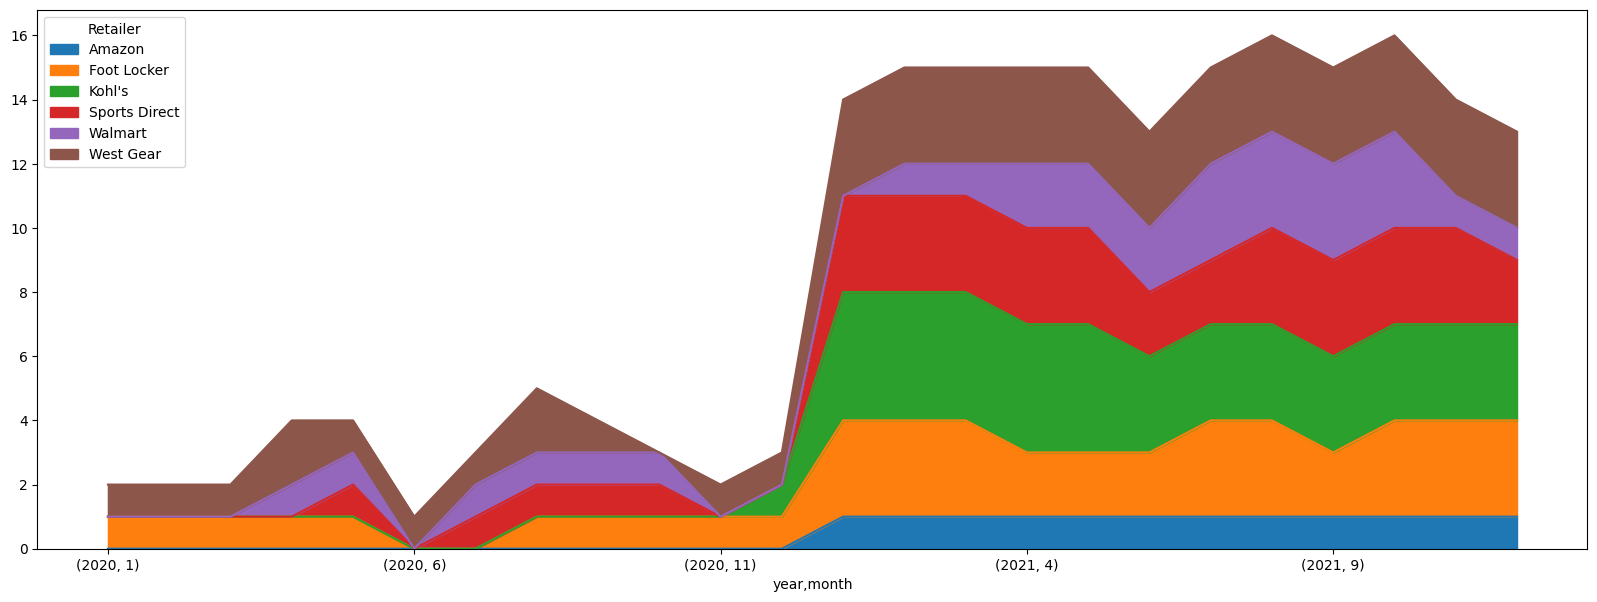

In [ ]:
# 연월에 따른 소매브랜드별 개수 증감 추이 시각화
df.pivot_table(index = ['year', 'month'], columns = 'Retailer',values = 'Retailer ID', aggfunc = 'count').plot(kind = 'area', figsize = (20,7))

- Amazon, Kohl's 브랜드의 경우, 2021년 01월을 기점으로 신규 판매.
- 그외 Foot Locker, Sports Direct, Walmart, West Grear도 이전 대비 판매 브랜드의 매장 개수가 늘어남.

아디다스는 2020년 코로나로 인해 매출액이 하락했다가 2021년에 회복세였음

https://www.statista.com/statistics/268416/net-sales-of-the-adidas-group-worldwide-since-2000/

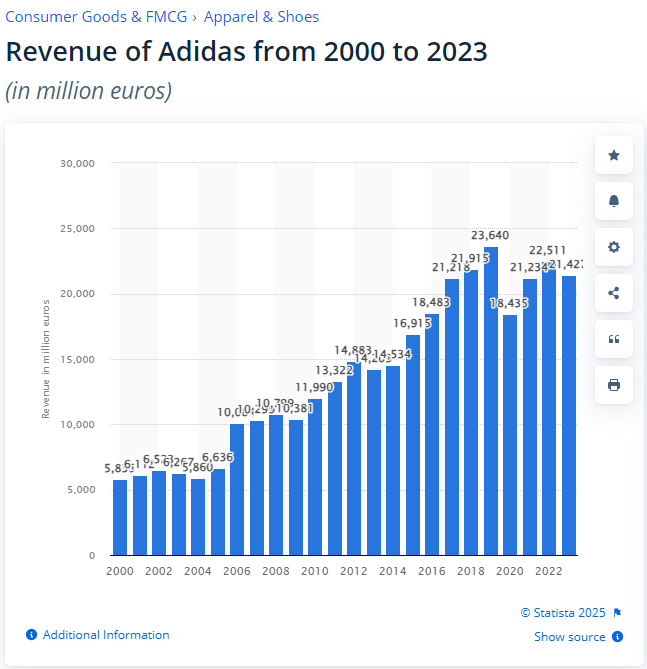

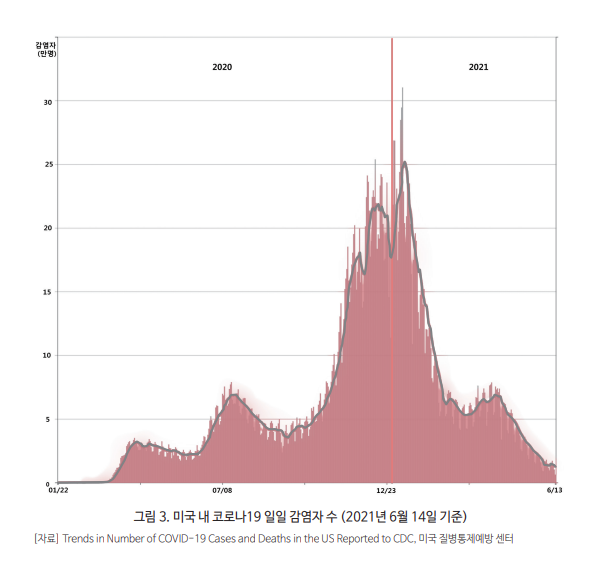

출처 : 보건산업브리프 Vol.329(보건산업진흥원)

<br><br><br><br>



---


<br><br><br><br>

## 마진율 분석

In [ ]:
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Operating_Margin_rate,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,0.50,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,0.30,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store,0.35,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store,0.35,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store,0.30,2020,1


In [ ]:
# 연도별 영업 마진율 바교
adidas.groupby('year').agg({'Operating_Margin_rate' : 'mean'})

,Operating_Margin_rate
year,
2020,0.403733
2021,0.425996


<Axes: xlabel='year,month'>

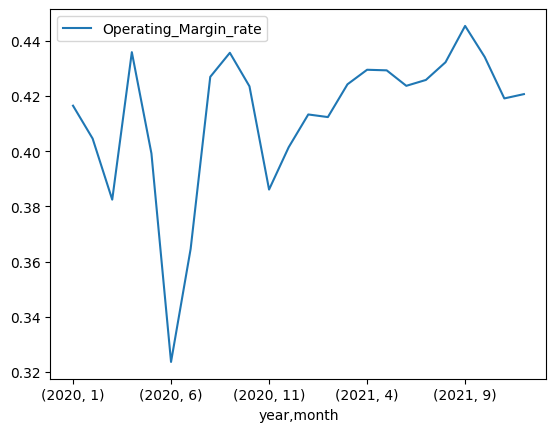

In [ ]:
# 월별 영업 마진율 시각화
adidas.pivot_table(index = ['year', 'month'], values = 'Operating_Margin_rate', aggfunc = 'mean').plot()

2020년 6월 기준, 급격한 영업 마진율 하락이 나타남.

<Axes: xlabel='year,month'>

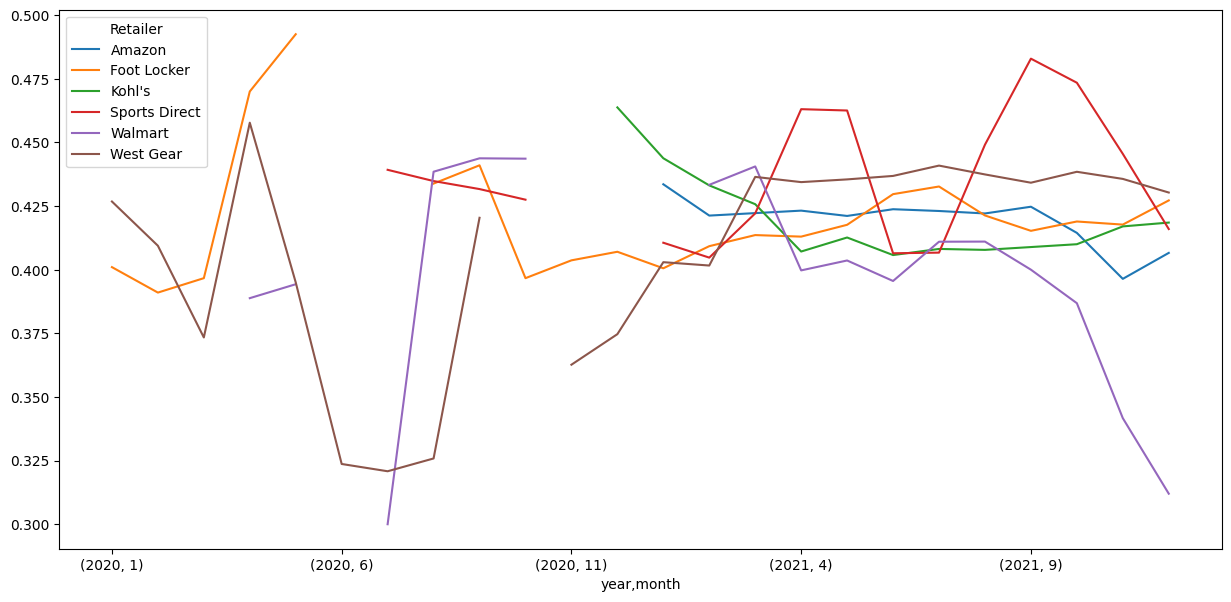

In [ ]:
# 소매브랜드별 영업 마진율 시각화
adidas.pivot_table(index = ['year', 'month'],columns = 'Retailer', values = 'Operating_Margin_rate', aggfunc='mean').plot(kind = 'line',figsize = (15,7))

* 2020년 6월 기준, Walmart와 West Gear는 30 초반의 영업마진율을 기록함.  
* 해당 시기에 다른 소매 브랜드의 경우, 판매를 중지한 것으로 예상됨.

## 판매방법에 따른 마진율/판매단가

Text(0, 0.5, 'Price per Unit')

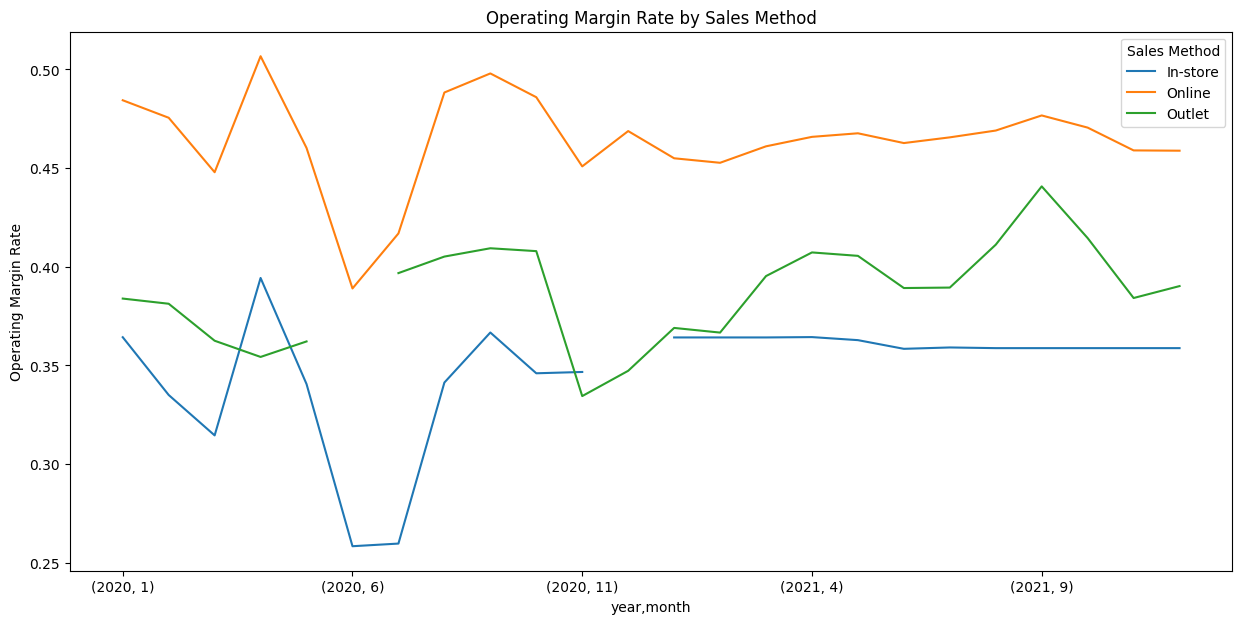

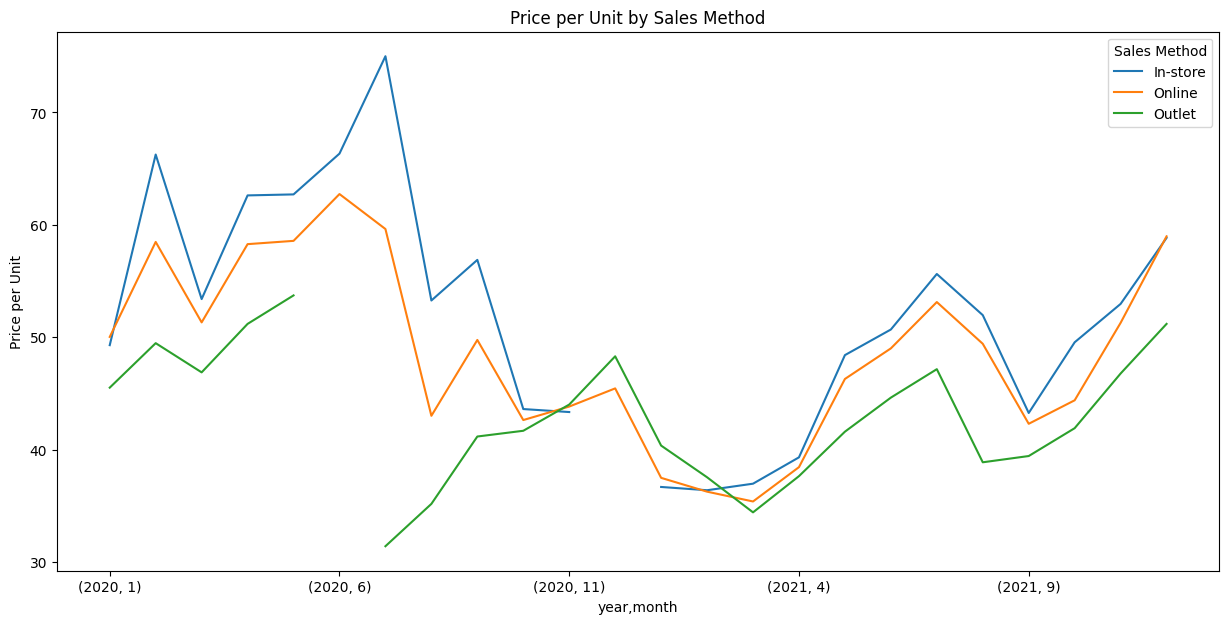

In [ ]:
# 판매방법에 따른 마진율/판매단가 시각화
adidas.pivot_table(index = ['year', 'month'],columns = 'Sales Method', values='Operating_Margin_rate', aggfunc='mean').plot(kind = 'line',figsize = (15,7))
# adidas.pivot_table(index = ['year', 'month'],columns = 'Sales Method', values = 'Operating_Margin_rate', aggfunc='mean').plot(kind = 'bar',figsize = (15,7)) # bar 차트 시각화
plt.title('Operating Margin Rate by Sales Method')
plt.ylabel('Operating Margin Rate')

adidas.pivot_table(index = ['year', 'month'],columns = 'Sales Method', values='Price per Unit', aggfunc='mean').plot(kind = 'line',figsize = (15,7))
plt.title('Price per Unit by Sales Method')
plt.ylabel('Price per Unit')

* 전 기간에 걸쳐 가장 높은 영업마진율을 기록한 판매수단은 **`온라인 판매`**임. (온라인 > 아울렛 > 영업점 판매 순)
* 2020년 6월, 아울렛 판매를 중단하고 영업점 및 온라인 판매 마진율이 급격히 하락함.

* 전 기간의 걸쳐 가장 높은 객단가를 유지한 판매수단은 **`영업점 판매`**임 (영업점 > 온라인 > 아울렛 판매 순)
* 2020년 6월, 비교적 높은 객단가를 기록하였으나, 영업마진율이 급격히 저조한 것으로 보아, 판매 수요 자체가 줄어들었음을 예측할 수 있음.

**결론**
* 영업점 판매의 경우, 단가가 가장 높고, 마진율이 낮은 것으로 보아 오프라인의 제품 원가가 높다.

## 판매방법에 따른 판매성과 분석 (분산 분석)


* 일원배치 분산분석(ANOVA)을 이용한 통계적 검증

* 세개 이상의 집단이 하나의 변수로 인해 차이가 나는지 검증하는 분석방법

* 최소자승법(OLS)를 이용하여 검증할 수 있음

BoxPlot을 이용한 시각화

Text(0, 0.5, 'Operating Margin Rate')

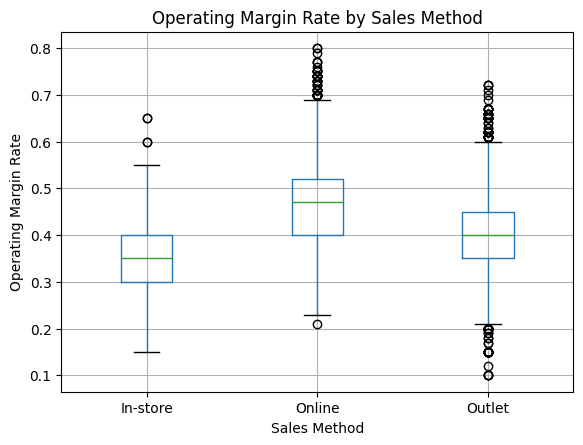

In [ ]:
adidas[['Sales Method', 'Operating_Margin_rate']].boxplot(by = 'Sales Method')
plt.title('Operating Margin Rate by Sales Method')
plt.suptitle('')
plt.xlabel('Sales Method')
plt.ylabel('Operating Margin Rate')

Text(0, 0.5, 'Price per Uni')

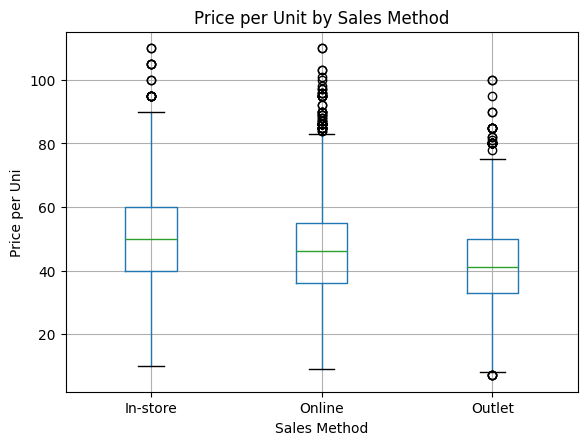

In [ ]:
adidas[['Sales Method', 'Price per Unit']].boxplot(by = 'Sales Method')
plt.title('Price per Unit by Sales Method')
plt.suptitle('')  # 상단 제목 제거
plt.xlabel('Sales Method')
plt.ylabel('Price per Unit')

#### ANOVA 함수

In [ ]:
# 라이브러리 임포트
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
# x : 비교그룹(매장, 온라인, 아울렛) -> Sales Method
# y : 비교할 변수 -> 영업이익, 단가
x = 'Sales Method'
y = 'Operating_Margin_rate'

In [ ]:
df = adidas[[x, y]]
df

,Sales Method,Operating_Margin_rate
0,In-store,0.50
1,In-store,0.30
2,In-store,0.35
3,In-store,0.35
4,In-store,0.30
...,...,...
9643,Outlet,0.28
9644,Outlet,0.32
9645,Outlet,0.37
9646,Outlet,0.42


In [ ]:
# statsmodels ols 함수의 공백 인식 문제로, 띄어쓰기를 _로 대체
x = x.replace(' ', '_')
y = y.replace(' ', '_')

print('대체 완료 \n x :', x, ', y :', y)

대체 완료 
 x : Sales_Method , y : Operating_Margin_rate


In [ ]:
df.columns

Index(['Sales Method', 'Operating_Margin_rate'], dtype='object')

In [ ]:
df.columns = [x, y]
df.columns

Index(['Sales_Method', 'Operating_Margin_rate'], dtype='object')

In [ ]:
# "C"는 categorical data 의미
# - 독립변수 x가 범주형 데이터임을 나타냄.
model = ols(f'{y} ~ C({x})', df).fit()

In [119]:
# ANOVA 분석 결과를 출력
anova_tb = anova_lm(model)  # ANOVA 테이블 생성
anova_tb

,df,sum_sq,mean_sq,F,PR(>F)
C(Sales_Method),2.0,18.450217,9.225109,1224.079115,0.0
Residual,9645.0,72.688254,0.007536,NaN,NaN


In [ ]:
# p-value를 기준으로 결과 해석
if anova_tb.iloc[0, 4] < 0.05:  # 유의확률 0.05 기준으로 p-value 값이 유의미한지 확인
    print(f'판매방법에 따른 {y}이(가) 차이가 있습니다.')
else:
    print(f'판매방법에 따른 {y}이(가) 차이가 나지 않습니다.')

판매방법에 따른 Operating_Margin_rate이(가) 차이가 있습니다.


In [120]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


# 함수 선언
def anova_analysis(x, y):
  # x : 비교그룹(매장, 온라인, 아울렛) -> Sales Method
  # y : 비교할 변수 -> 영업이익, 단가
  df = adidas[[x, y]]


  # 띄어쓰기 있는 경우 statsmodels의 ols 함수가 인식 못함
  # 띄어쓰기를 _로 바꿈
  x = x.replace(' ', '_')
  y = y.replace(' ', '_')

  print('바뀐 이름 : ', x, ':', y)

  df.columns = [x, y]

  # 1. "C"는 categorical data를 의미
  # - 독립변수 x가 범주형 데이터임을 나타냄.
  model = ols(f'{y} ~ C({x})', df).fit()

  # 2. ANOVA 분석 결과 출력
  anova_tb = anova_lm(model)  # ANOVA 테이블 생성

  # 3. p-value를 기준으로 결과 해석
  if anova_tb.iloc[0, 4] < 0.05:  # p-value 값이 유의수준 0.05 기준에 따라 차이가 있는지 확인
      print(f'판매방법에 따른 {y}이(가) 차이가 있습니다.') # 0.05 미만 시 대립가설 채택
  else:
      print(f'판매방법에 따른 {y}이(가) 차이가 나지 않습니다.') # 0.05 미만 시 귀무가설 채택


In [ ]:
print('판매가격의 차이 검증')
anova_analysis('Sales Method', 'Price per Unit')
print('\r\n\r\n')
print("======================================================")
print('\r\n\r\n')
print('마진율의 차이 검증')
anova_analysis('Sales Method', 'Operating_Margin_rate')

판매가격의 차이 검증
바뀐 이름 :  Sales_Method : Price_per_Unit
                     df        sum_sq       mean_sq           F        PR(>F)
C(Sales_Method)     2.0  5.550261e+04  27751.304281  131.810754  3.339384e-57
Residual         9645.0  2.030649e+06    210.538999         NaN           NaN
판매방법에 따른 Price_per_Unit이(가) 차이가 있습니다.






마진율의 차이 검증
바뀐 이름 :  Sales_Method : Operating_Margin_rate
                     df     sum_sq   mean_sq            F  PR(>F)
C(Sales_Method)     2.0  18.450217  9.225109  1224.079115     0.0
Residual         9645.0  72.688254  0.007536          NaN     NaN
판매방법에 따른 Operating_Margin_rate이(가) 차이가 있습니다.


=> 판매방법에 따라 단가 차이가 있다.
In-Store > On-line > Outlet 순
<br>
<br>

=> 즉, 매장 방법 손님의 객단가가 가장 높고, 다음으로 온라인, 아웃렛 순으로 높음
=> 할인율이 높다는 의미는 아님
<br>
<br>
=> 아울렛은 매장, 온라인에서 판매되지 않는 상품이 판매되기 때문에 인사이트 분석을 위한 비교대상으로 보기 어려움
<br>
<br>
=> 판매방법에 따라 마진율(이익율) 차이가 있다.
On-line > Outlet > In-Store 순
<br><br>
<br>
**분석 결과**
<br>
=> 온라인 : 단가 낮은 상품이 많이 팔리고, 마진율(이익율)은 높음
<br>
=> 매장 : 단가 높은 상품 많이 팔리고, 마진율(이익율)도 낮음

<br>
온/오프라인 판매전략 수립에 활용